# Splitting Videos using Semantic Router's ViT Encoder

Similar to prose, videos are a sequence of frames with a temporal component.

By using similarity between these frames, we can effectively split videos based on the constitutent frames' semantic


Let's start by loading a test video and splitting it into frames

In [34]:
import cv2
vidcap = cv2.VideoCapture('https://www.w3schools.com/html/mov_bbb.mp4')

frames = []
success,image = vidcap.read()
while success:
    frames.append(image)
    success, image = vidcap.read()
len(frames)

250

In [35]:
from PIL import Image

image_frames = list(map(Image.fromarray, frames))
len(image_frames)

250

Now that we have the frames loaded, we can go ahead and use the `semantic_splitter` functionality to create splits based on frame similarity

First, lets initialise our ViT Encoder

In [36]:
from semantic_router.encoders import VitEncoder

encoder = VitEncoder(device="mps")

/Users/bogdanbuduroiu/development/aurelio-labs/semantic-router/.venv/lib/python3.9/site-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(
Some weights of ViTModel were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized: ['vit.pooler.dense.bias', 'vit.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [37]:
from semantic_router.utils.splitters import semantic_splitter
splits = semantic_splitter(encoder=encoder, docs=image_frames, threshold=0.5)
len(splits)

2

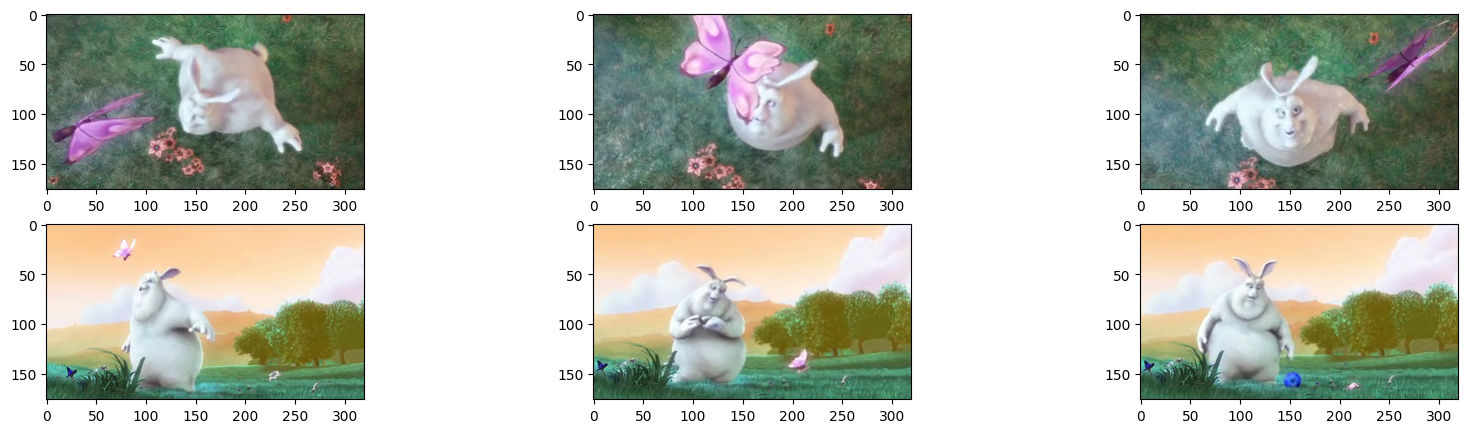

In [50]:
import matplotlib.pyplot as plt

f, axarr = plt.subplots(len(splits), 3, figsize=(20,5))

for i, split in enumerate(splits):
    axarr[i,0].imshow(split.docs[0])
    num_docs = len(split.docs)
    mid = num_docs // 2
    axarr[i,1].imshow(split.docs[mid])
    axarr[i,2].imshow(split.docs[num_docs-1])

The video has two main camera angles, which is represented here by two Semantic Splits. (each row represents 1 split, columns represent frame samples within the split)

Split #1 - scene 1, high angle shot of Big Buck Bunny looking up at a butterfly

Split #2 - scene 2, straight-up angle shot of Big Buck Bunny, with a distinct yellow background

Using ViT features from frames, we were able to distinguish these two scenes

## What about non-animated footage?

Depending on the complexity of the footage you're trying to semantically split, you might need to adjust the `threshold` parameter for `semantic_splitter`

Let's use a public domain video from the automotive domain to demonstrate

In [53]:
vidcap = cv2.VideoCapture('http://commondatastorage.googleapis.com/gtv-videos-bucket/sample/WeAreGoingOnBullrun.mp4')

frames = []
success,image = vidcap.read()
while success:
    frames.append(image)
    success, image = vidcap.read()
image_frames = list(map(Image.fromarray, frames))
len(image_frames)

1139

### How to pick the right `threshold`?

It's an art as much as it is a science.

A lower threshold value means that the splitter is more lenient to accepting frames within a `split`, with threshold 0 meaning all frames are just 1 split

Conversely, the higher the threshold value, the more strict the splitter is, with threshold 1 putting each frame (besides 100% identical ones) into the same split.

For this video, we empirically found a value of `0.65` to work the best.

In [64]:
splits = semantic_splitter(encoder=encoder, docs=image_frames, threshold=0.65)

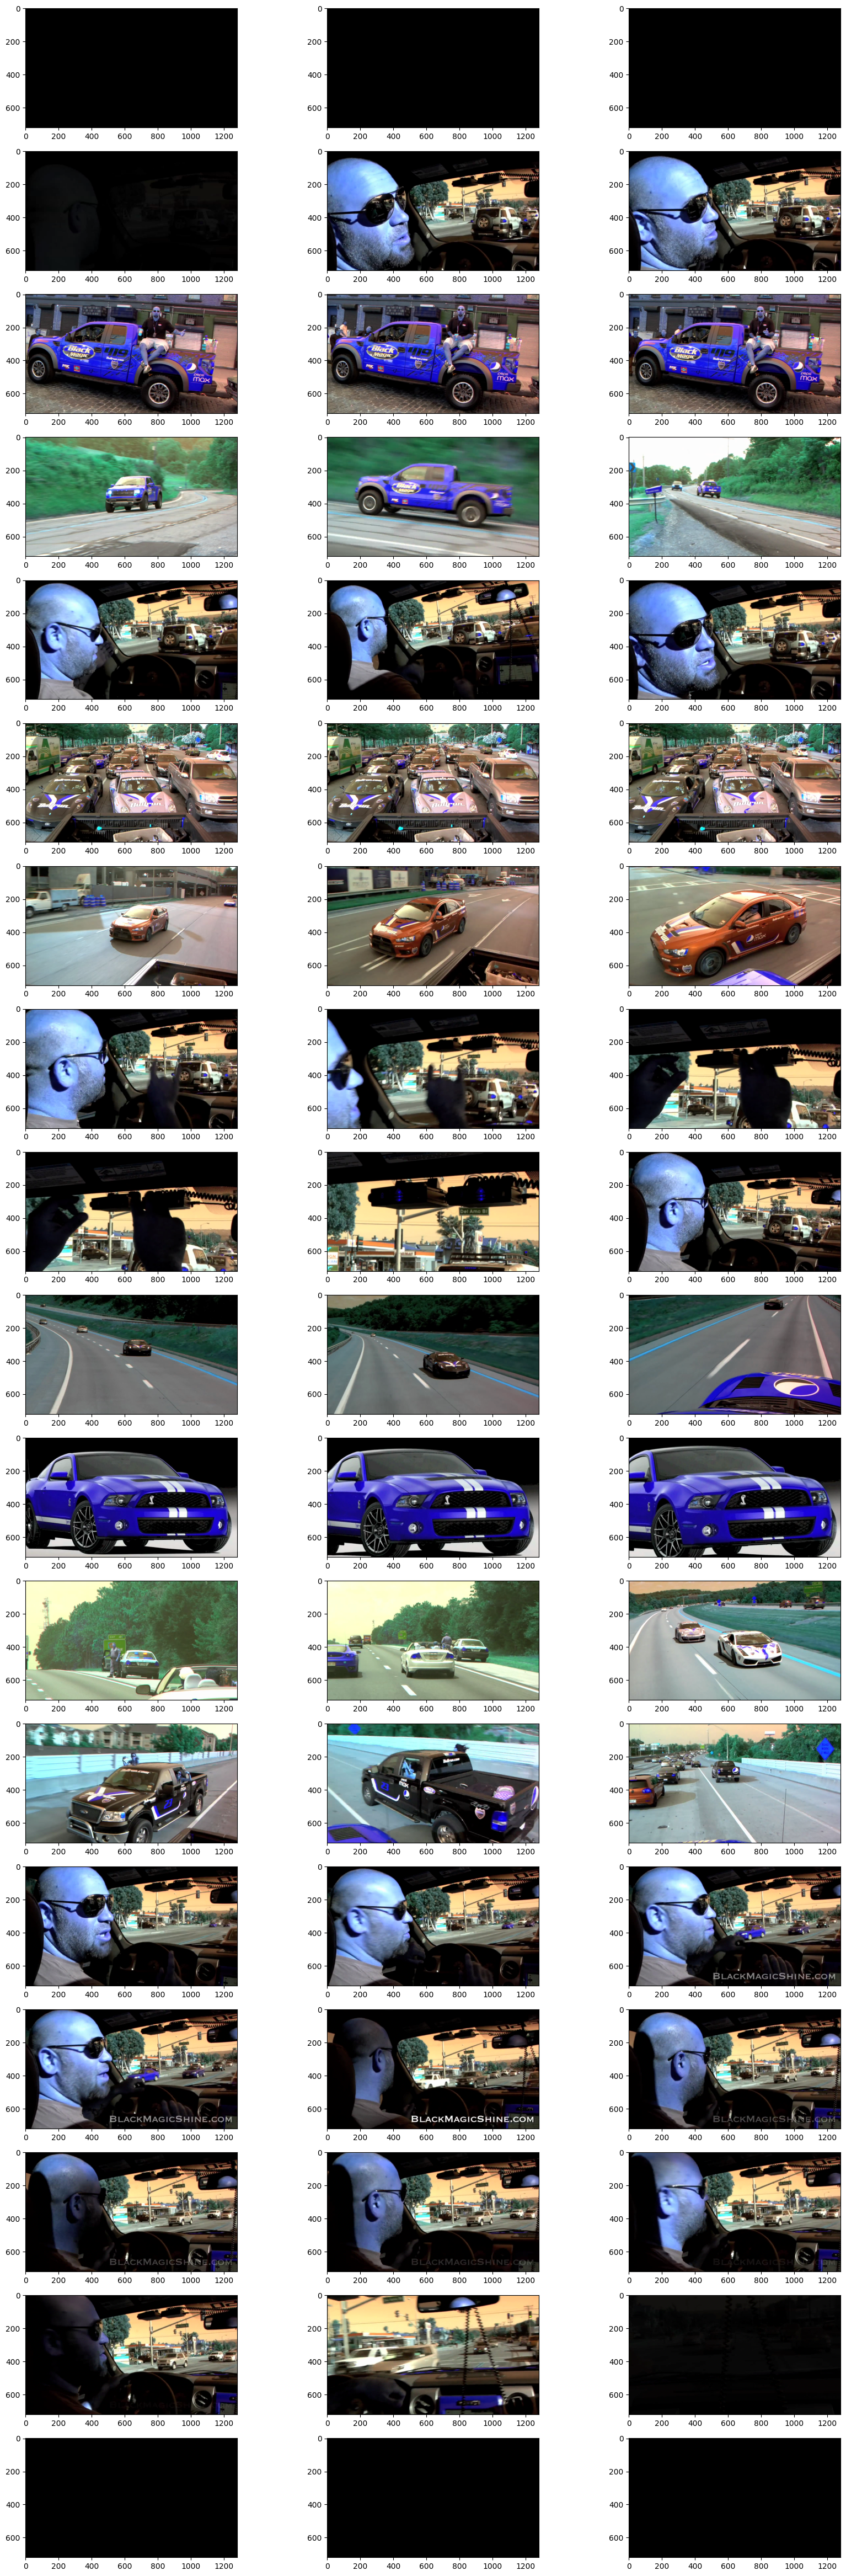

In [65]:
import matplotlib.pyplot as plt

f, axarr = plt.subplots(len(splits), 3, figsize=(20,60))

for i, split in enumerate(splits):
    axarr[i,0].imshow(split.docs[0])
    num_docs = len(split.docs)
    mid = num_docs // 2
    axarr[i,1].imshow(split.docs[mid])
    axarr[i,2].imshow(split.docs[num_docs-1])